In [12]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# use Sobel and Gaussian filters

## Start here if working on google collab

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [15]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [16]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [18]:
# Reading and converting the image
in_image = mpimg.imread(path+'Data/droplet1g.jpg')
f = in_image.astype(np.float64)

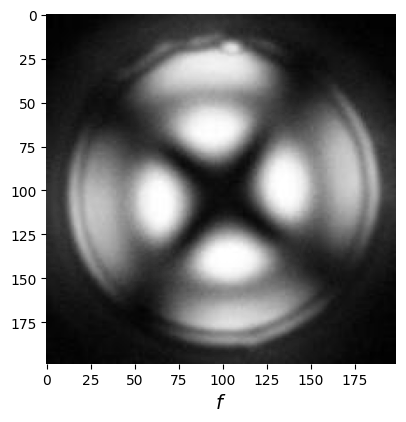

In [19]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(f.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f$', fontsize=14)
plt.show()

## Sobel filter

In [20]:
from scipy.signal import convolve2d
import matplotlib.cm as cm

# Read and convert the image
in_image = plt.imread(path+'Data/droplet1g.jpg')
f = in_image.astype(np.float64)

In [21]:
# Apply Sobel filter in the vertical direction
g = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).T
fn = convolve2d(f, g, mode='same')

# Use a reverse color map to better visualize gradients
c = np.linspace(0.99, 0.0, 64)
C = np.array([c, c, c]).T
cmap = cm.colors.ListedColormap(C)

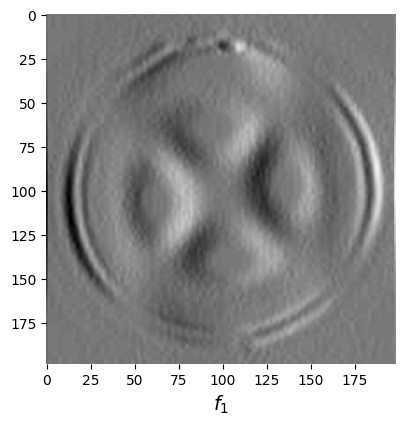

In [22]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
plt.imshow(fn, cmap=cmap)
plt.box(False)
plt.xlabel('$f_1$', fontsize=14)
plt.show()

## Gaussian Filter

In [23]:
from scipy.ndimage import gaussian_filter

# Read and convert the image
in_image = plt.imread(path+'Data/droplet1g.jpg')
f = in_image.astype(np.float64)

In [24]:
# Apply Gaussian filter (low sigma)
sigma = 1
fn = gaussian_filter(f, sigma=sigma)

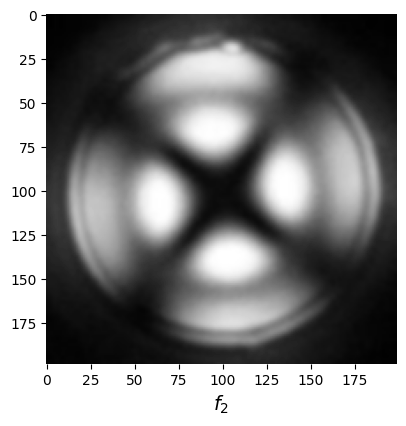

In [25]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
plt.imshow(fn.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f_2$', fontsize=14)
plt.show()

In [26]:
# Apply Gaussian filter (high sigma)

sigma = 10
fn2 = gaussian_filter(f, sigma=sigma)

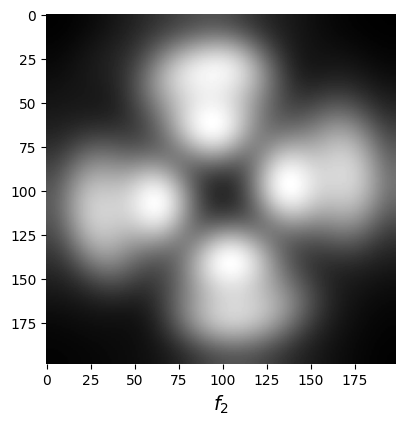

In [27]:
# Plotting
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 4)
plt.imshow(fn2.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f_2$', fontsize=14)
plt.show()

## Gaussian filter using convolution theorem

In [28]:
from scipy.fftpack import fft2, ifft2, fftshift
from scipy.ndimage import gaussian_filter

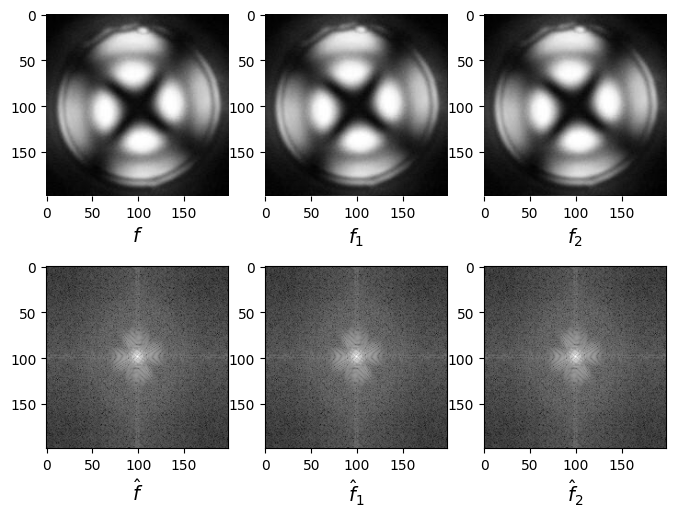

In [30]:
# Plotting
plt.figure(figsize=(8, 6))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(f.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f$', fontsize=14)

# FFT of the original image
plt.subplot(2, 3, 4)
F = fft2(f)
S = fftshift(np.log(1 + np.abs(F)))
plt.imshow(S, cmap='gray')
plt.xlabel('$\\hat{f}$', fontsize=14)

# Eliminate high frequencies (small sigma)
sigma = 1
hsize = len(f)
g = gaussian_filter(np.zeros_like(f), sigma=sigma)
g[hsize//2, hsize//2] = 1
g = fft2(g)

plt.subplot(2, 3, 5)
ff = fft2(f) * g
S = fftshift(np.log(1 + np.abs(ff)))
plt.imshow(S, cmap='gray')
plt.xlabel('$\\hat{f}_1$', fontsize=14)

fn = ifft2(ff)
fn = np.real(fftshift(fn))

plt.subplot(2, 3, 2)
plt.imshow(fn.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f_1$', fontsize=14)

# Eliminate low frequencies (large sigma)
sigma = 10
g2 = gaussian_filter(np.zeros_like(f), sigma=sigma)
g2[hsize//2, hsize//2] = 1
g2 = fft2(g2)

plt.subplot(2, 3, 6)
ff = fft2(f) * g2
S = fftshift(np.log(1 + np.abs(ff)))
plt.imshow(S, cmap='gray')
plt.xlabel('$\\hat{f}_2$', fontsize=14)

fn = ifft2(ff)
fn = np.real(fftshift(fn))

plt.subplot(2, 3, 3)
plt.imshow(fn.astype(np.uint8), cmap='gray')
plt.box(False)
plt.xlabel('$f_2$', fontsize=14)

plt.show()
